## In this notebook we will try to train a model using the data from Yahoo Finance in order to predict stock price movements and whether we can do it or not.


In [1]:
#importing libraries
import yfinance as yf

In [2]:
#^GSPC is s&p ticker we use it to retrieve data from  yahoo
sp500=yf.Ticker("^GSPC")

In [3]:

sp500=sp500.history(period="max")

In [4]:
sp500 = sp500.loc[(sp500.index >= "1950-01-03") & (sp500.index <= "2025-03-29")]
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03 00:00:00-05:00,16.66,16.66,16.66,16.66,1260000,0.0,0.0
1950-01-04 00:00:00-05:00,16.85,16.85,16.85,16.85,1890000,0.0,0.0
1950-01-05 00:00:00-05:00,16.93,16.93,16.93,16.93,2550000,0.0,0.0
1950-01-06 00:00:00-05:00,16.98,16.98,16.98,16.98,2010000,0.0,0.0
1950-01-09 00:00:00-05:00,17.08,17.08,17.08,17.08,2520000,0.0,0.0


<Axes: xlabel='Date', ylabel='Close'>

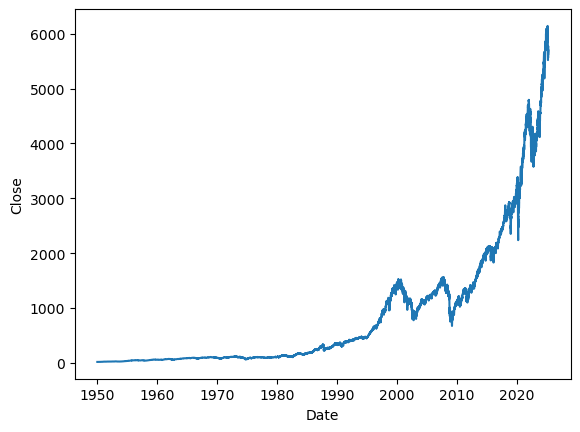

In [5]:

#taking a look if data've been loaded normally
import seaborn as sns
sns.lineplot(data=sp500,y='Close',x="Date")

In [6]:
#we drop Stock splits and divident colums, they are not important for our prediction

sp500=sp500.drop(['Stock Splits','Dividends'],axis=1)

In [7]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...
2025-03-24 00:00:00-04:00,5718.080078,5775.140137,5718.080078,5767.569824,4517990000
2025-03-25 00:00:00-04:00,5775.959961,5786.950195,5760.419922,5776.649902,4467340000
2025-03-26 00:00:00-04:00,5771.660156,5783.620117,5694.410156,5712.200195,4183140000


In [8]:
# 'Tomorrow' column is a price that market will close the next day. We use shift to add column of closed prices for each previous days
sp500['Tomorrow']=sp500['Close'].shift(-1)
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03 00:00:00-05:00,16.66,16.66,16.66,16.66,1260000,16.850000
1950-01-04 00:00:00-05:00,16.85,16.85,16.85,16.85,1890000,16.930000
1950-01-05 00:00:00-05:00,16.93,16.93,16.93,16.93,2550000,16.980000
1950-01-06 00:00:00-05:00,16.98,16.98,16.98,16.98,2010000,17.080000
1950-01-09 00:00:00-05:00,17.08,17.08,17.08,17.08,2520000,17.030001


### Target column is indicating whether price will increae/decrease tomorrow. Predicting it is more crucial for trading than what the price will be becuase  the exact price is not useful for us that much. We need to know how price behave day-over-day 

In [10]:

sp500['Target']=(sp500['Tomorrow']>sp500['Close']).astype(int)
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03 00:00:00-05:00,16.66,16.66,16.66,16.66,1260000,16.850000,1
1950-01-04 00:00:00-05:00,16.85,16.85,16.85,16.85,1890000,16.930000,1
1950-01-05 00:00:00-05:00,16.93,16.93,16.93,16.93,2550000,16.980000,1
1950-01-06 00:00:00-05:00,16.98,16.98,16.98,16.98,2010000,17.080000,1
1950-01-09 00:00:00-05:00,17.08,17.08,17.08,17.08,2520000,17.030001,0


### The reason why we drop the data before 90's is that it's redundant and too old.The market behaviour was different,  and we cant use that data as it will create bias



In [12]:
sp500 = sp500.loc[sp500.index >= "1990-01-01"]
sp500=sp500.copy()
#if we dont make copy, python will raise in the next cells

### Random forest is overfitting less comparing with  other  ml techniques, and the reason is that it combines the predictions of multiple trees, which reduces the variance of the model

In [14]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)
#n estimator means the number of trees and increases accuracy up to a limit\
# min samples protect against overfitting, if the trees are too deep model can overfit, but model becomes less accuracy and it's our  trade-off
train=sp500.iloc[:-100]
test=sp500.iloc[-100:]

predictors=["Close",'Volume','Open','High','Low']
model.fit(train[predictors],train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

### You may ask why we didn't use train_test_split because train_test_split splits the data randomly. In our case, if we use it,it will result in data leakage: model will use data of future - the data that it should not know- to train the model. Imagine it: you know the data on how much  something will cost in  future, of course you will be able to predict it. So we used all the rows, save 100, for training and the last 100 for testting

In [16]:
from sklearn.metrics import precision_score
import pandas as pd
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)


0.46153846153846156

#### Well, at this model our result are actually useless. 46% of times when  our model said that pricess will increase they actually did. At this point, it is better for us to do the opposite of what model tells us

In [18]:
combined=pd.concat([test['Target'],preds],axis=1)

<Axes: xlabel='Date'>

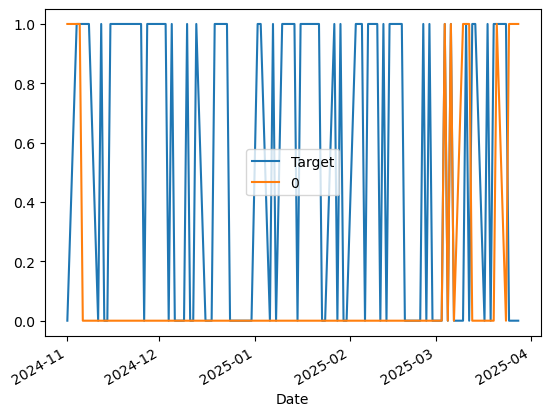

In [19]:
combined.plot()

#### Until now we've been using data to predict the last 100 days. But when you build model to predict stock price models you need it to predict across different timeframes. So what we are gonna do now is backtesting. We use first 10 years to predict the 11th year.Then use the data of 11 years to predict 12th year, and so  on over and over again

In [21]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index,name='Predictions')
    precision_score(test["Target"], preds)
    combined=pd.concat([test['Target'],preds],axis=1) 
    return combined
    

In [22]:
def backtest(data,model,predictors,start=2500,step=250): # each traing year has approcimately 250 trading days(10*250=2500)
    all_predictions=[]

    for i in range(start, data.shape[0],step):
        train=data.iloc[0:i].copy()
        test=data.iloc[i:(i+step)].copy() # we move on and use additional 250 days(1 year) and do predcitions again
        predictions=predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
    
    

In [23]:
predictions=backtest(sp500, model, predictors)

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
predictions['Predictions'].value_counts() # to tell us how many of increases and decreases we predicted

Predictions
0    3735
1    2641
Name: count, dtype: int64

In [25]:
precision_score(predictions['Target'],predictions["Predictions"]) # we are 52% accurate

0.5285876561908368

In [26]:
predictions['Target'].value_counts()/predictions.shape[0] #we are a little bit worse that the market did, lets continue to improve

Target
1    0.535759
0    0.464241
Name: count, dtype: float64

##### We will create new independent variables for the model to improve it. We will create rollling averages of different timeframes 2 days , week, 2 moths, year and 4 years.

In [27]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500.loc[:,ratio_column] = sp500["Close"] / rolling_averages["Close"] # to add new coluns and concatenate them
    
    trend_column = f"Trend_{horizon}"
    sp500.loc[:, trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"] 
#number of days in the past x days -whatever the horizon is- that the stock price actually went up and what we can do here is say trend


    
    new_predictors+= [ratio_column, trend_column]

In [28]:
sp500=sp500.dropna()
sp500
#we drop the NAs that were created because our rolling averages, when  there is not enough days, gives a NA value

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-21 00:00:00-04:00,5630.729980,5670.839844,5603.100098,5667.560059,9367460000,5767.569824,1,1.000412,1.0,1.001494,3.0,0.956933,31.0,1.005546,140.0,1.222474,528.0
2025-03-24 00:00:00-04:00,5718.080078,5775.140137,5718.080078,5767.569824,4517990000,5776.649902,1,1.008746,2.0,1.015848,3.0,0.974386,31.0,1.022902,141.0,1.243561,529.0
2025-03-25 00:00:00-04:00,5775.959961,5786.950195,5760.419922,5776.649902,4467340000,5712.200195,0,1.000787,2.0,1.011674,4.0,0.976644,31.0,1.024107,142.0,1.245035,529.0


In [29]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
# Remember: n estimator means the number of trees and increases accuracy up to a limit.We change it to increase accracy
# min samples protect against overfitting, if the trees are too deep model can overfit, but model becomes less accuracy and it's our  trade-off
# we decrease split size to not overfit the model

In [30]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
#we set a new condition too be more accurate. Model will say "increase" if it is more than 60% sure of it and vice-versa
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [31]:
predictions = backtest(sp500, model, new_predictors)
#we will only use ratios- new_predictors that we created earlier since they are more informative than previous variables

In [32]:
predictions["Predictions"].value_counts()
# as we set a threshold of 60%, model only says '1' when it is more sure.Thefore model predicts it rarely when it is more confident
# What that means is, we gonna buy  stocks rarely, and, hopefully, be more accurate


Predictions
0.0    4508
1.0     867
Name: count, dtype: int64

In [33]:
precision_score(predictions["Target"], predictions["Predictions"])
# 57% of times the price actually goes up


0.5709342560553633

In [34]:
predictions["Target"].value_counts() / predictions.shape[0]

# our model has a predictive value. Stocks went up on 54% of the days and , on days it says to buy it is accurate 57% of time 

Target
1    0.545302
0    0.454698
Name: count, dtype: float64

##### If you want to extend the model, you can add other indices from other countries to correleate to see whether indices  of other markets( Japan for instance) can predict the movement.In addition you add news,articles that are coming out and how they affect the price, interest rate data and so on. Unfortunately as of for now my skills are not sufficient for that at this point of time )))



# Thank you for your attention, wish you on exam days :)

In [76]:
predictions.tail(20)

,Target,Predictions
Date,,
2025-02-28 00:00:00-05:00,0,0.0
2025-03-03 00:00:00-05:00,0,0.0
2025-03-04 00:00:00-05:00,1,0.0
2025-03-05 00:00:00-05:00,0,0.0
2025-03-06 00:00:00-05:00,1,0.0
2025-03-07 00:00:00-05:00,0,0.0
2025-03-10 00:00:00-04:00,0,0.0
2025-03-11 00:00:00-04:00,1,0.0
2025-03-12 00:00:00-04:00,0,0.0
